In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Defining the used metrics

In [2]:
POWER = 'metricq'
IPC = 'perf-ipc'
IPC_2 = 'ipc-estimate'
FREQ = 'perf-freq'
ITEMS = [POWER, IPC, IPC_2, FREQ]

#### Read the json output of FIRESTARTER

In [3]:
with open('conway_2021-04-29_18:49:50+0200.json', 'r') as fp:
    data = json.loads(fp.read())
    startTime = data['startTime']
    del data['startTime']
    endTime = data['endTime']
    del data['endTime']
    args = data['args']
    del data['args']
    hostname = data['hostname']
    del data['hostname']
    payloadItems = data['payloadItems']
    del data['payloadItems']
df = pd.DataFrame(data)

print(f"Evaluating FIRESTARTER run on {hostname} from {startTime} to {endTime} with args: {args}")

Evaluating FIRESTARTER run on conway from 2021-04-29_18:49:50+0200 to 2021-04-29_21:11:09+0200 with args: ['FIRESTARTER', '--optimize=NSGA2', '-t', '10', '--preheat=240', '--optimization-metric=metricq,perf-ipc', '--metric-path=libmetric-metricq.so', '--individuals=40', '--generations=20', '--nsga2-m=0.35']


In [4]:
for v in ITEMS:
    df[v] = df['metrics'].apply(lambda arr: round(arr[v]['average'], 2))
    
df = df.drop(columns=['metrics'])
df[IPC] *= 2
df

,individuals,metricq,perf-ipc,ipc-estimate,perf-freq
0,"[1, 0, 0, 0, 0, 0]",327.55,0.16,0.05,1.49
1,"[0, 1, 0, 0, 0, 0]",281.40,1.14,0.34,1.50
2,"[0, 0, 1, 0, 0, 0]",259.18,1.98,0.59,1.50
3,"[0, 0, 0, 1, 0, 0]",246.17,1.60,0.48,1.50
4,"[0, 0, 0, 0, 1, 0]",262.91,4.00,1.19,1.50
...,...,...,...,...,...
803,"[11, 21, 17, 46, 14, 55]",397.71,2.34,0.70,1.49
804,"[73, 0, 20, 23, 74, 60]",336.68,0.54,0.16,1.49
805,"[0, 63, 17, 84, 72, 87]",327.09,3.86,1.15,1.50
806,"[0, 0, 33, 24, 60, 85]",285.37,4.36,1.30,1.50


In [5]:
print(df[df[IPC] > 4])

                individuals  metricq  perf-ipc  ipc-estimate  perf-freq
79   [0, 0, 58, 35, 80, 87]   290.31      4.38          1.31        1.5
136  [0, 0, 65, 29, 83, 66]   292.81      4.34          1.30        1.5
155  [0, 0, 23, 35, 77, 33]   286.18      4.08          1.21        1.5
166  [0, 0, 65, 53, 90, 18]   297.89      4.16          1.24        1.5
199   [0, 0, 23, 35, 9, 87]   277.99      4.06          1.21        1.5
..                      ...      ...       ...           ...        ...
730   [0, 0, 2, 52, 72, 46]   285.89      4.38          1.31        1.5
737  [0, 0, 20, 23, 78, 60]   288.75      4.48          1.34        1.5
756  [0, 0, 30, 16, 48, 96]   278.76      4.06          1.21        1.5
800   [2, 0, 42, 8, 67, 60]   338.28      4.02          1.20        1.5
806  [0, 0, 33, 24, 60, 85]   285.37      4.36          1.30        1.5

[78 rows x 5 columns]


In [6]:
# get the optimium used in heatmap plots and mark it
_, hx, hy, _, _ = list(np.array(df.sort_values(by=POWER, ascending=False))[0])

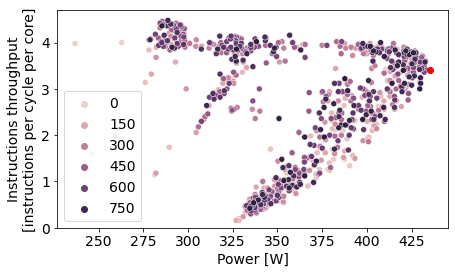

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(7,4))
p = sns.scatterplot(data=df, x=POWER, y=IPC, hue=range(len(df)))
p.set_ylim(0)
plt.xlabel('Power [W]')
plt.ylabel('Instructions throughput\n[instructions per cycle per core]')
# mark the optimum red
p.scatter(hx, hy, color = 'red')

plt.savefig('../../paper/fig/conway_1500_power_ipc.pdf', bbox_inches='tight')

#### This shows the correlation between the perf-ipc and ipc-estimate metric

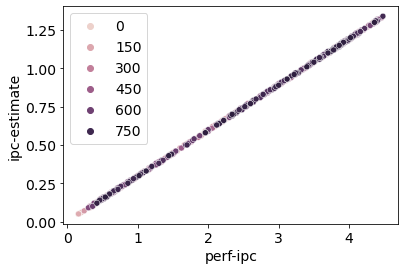

In [8]:
p = sns.scatterplot(data=df, x=IPC, y=IPC_2, hue=range(len(df)))

#### Show the evaluated individuals sorted by Power

In [9]:
df.sort_values(by=POWER, ascending=False)

,individuals,metricq,perf-ipc,ipc-estimate,perf-freq
227,"[11, 15, 74, 84, 57, 18]",435.40,3.40,1.01,1.49
506,"[11, 27, 34, 84, 90, 10]",432.85,3.42,1.02,1.49
435,"[11, 27, 34, 84, 90, 24]",432.81,3.60,1.07,1.49
763,"[11, 31, 34, 84, 78, 37]",432.54,3.58,1.07,1.49
106,"[11, 27, 34, 84, 78, 37]",432.43,3.62,1.07,1.49
...,...,...,...,...,...
180,"[0, 0, 65, 0, 1, 0]",259.20,1.98,0.59,1.50
2,"[0, 0, 1, 0, 0, 0]",259.18,1.98,0.59,1.50
119,"[0, 0, 95, 0, 0, 1]",258.99,2.00,0.59,1.50
3,"[0, 0, 0, 1, 0, 0]",246.17,1.60,0.48,1.50
